# Code used to create Figure 2

In [5]:
library(data.table)
library(ggplot2)
library(RColorBrewer)
library(ggsci)
library(magrittr) 
library(ggrepel)

## Figure 2a

   Range  Data   N
1      1 Trans   7
2      1   EUR   3
3      1   EAS   3
4    2-5 Trans  16
5    2-5   EUR   5
6    2-5   EAS   4
7   6-10 Trans  20
8   6-10   EUR  10
9   6-10   EAS   6
10   11+ Trans  79
11   11+   EUR 104
12   11+   EAS 109


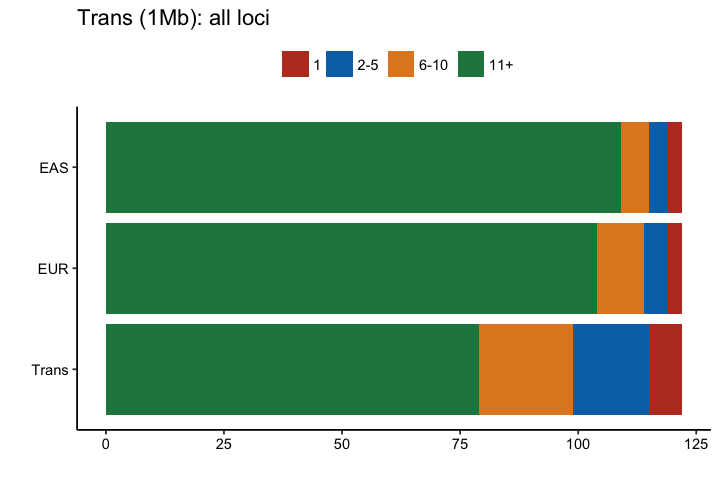

In [3]:
options(repr.plot.width=6, repr.plot.height=4)

#load data
load("../data/Figure2a.RData")
res <- out

out %>% ggplot(aes(x=Data,y=N,fill=Range)) +
    geom_bar(stat="identity") +
    coord_flip() +
    theme_bw() +
    theme(legend.position="top") +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) +
    labs(title="Trans (1Mb): all loci",x="",y="") +
    scale_fill_nejm(name="") 

show(res)


## Figure 2c


  1   2 
  5 117 

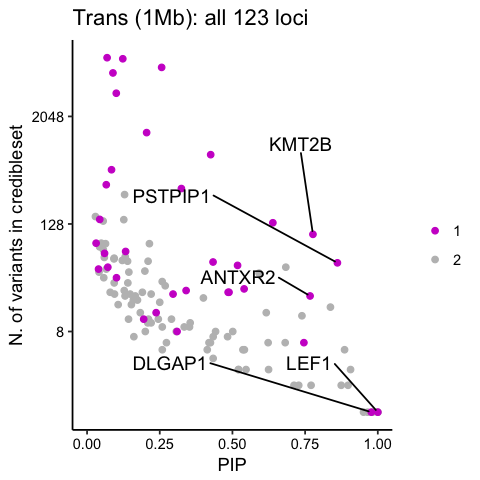

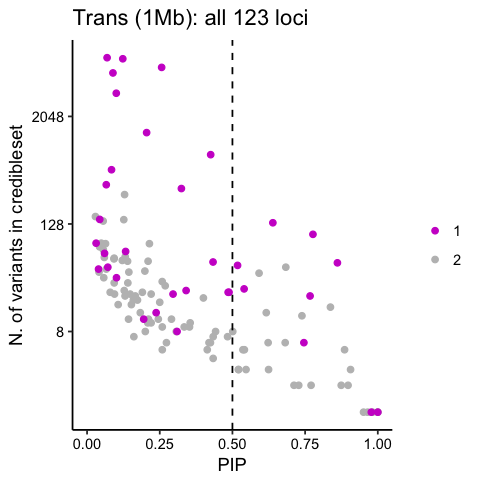

In [9]:
#load data
load("../data/Figure2b.RData")

#plot
df <- out
df$is_label <- ifelse( df$value.y > 0.75 & df$is_novel=="1", "1", "2")
table(df$is_label)

options(repr.plot.width=4, repr.plot.height=4)

#with label
df[order(df$is_novel,decreasing=T),] %>% ggplot(aes(x=value.y, y=value.x, color=is_novel)) +
    geom_point() +
    theme_bw() +
     #theme( legend.position = "none") +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) +
    labs(title="Trans (1Mb): all 123 loci",x="PIP",y="N. of variants in credibleset") +
    #scale_fill_npg() +
    scale_color_manual(values=c('1' = "magenta3", '2' = "grey"),
                      name="") +
    scale_x_continuous(limits=c(0,1)) +
    scale_y_continuous(trans='log2') +
    geom_text_repel(data=subset(df, is_label==1),
         aes(x=value.y, y=value.x, label = Gene ),
         size=4,
         box.padding   = unit(2.5, "lines"),
         point.padding = unit(0.1, "lines"),
         col="black"
     )

#without label
df[order(df$is_novel,decreasing=T),] %>% ggplot(aes(x=value.y, y=value.x, color=is_novel)) +
    geom_point() +
    theme_bw() +
     #theme( legend.position = "none") +
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) +
    labs(title="Trans (1Mb): all 123 loci",x="PIP",y="N. of variants in credibleset") +
    #scale_fill_npg() +
    scale_color_manual(values=c('1' = "magenta3", '2' = "grey"),
                      name="") +
    scale_x_continuous(limits=c(0,1)) +
    scale_y_continuous(trans='log2') +
    geom_vline(xintercept=0.5,linetype="dashed") 


## Figure 2c

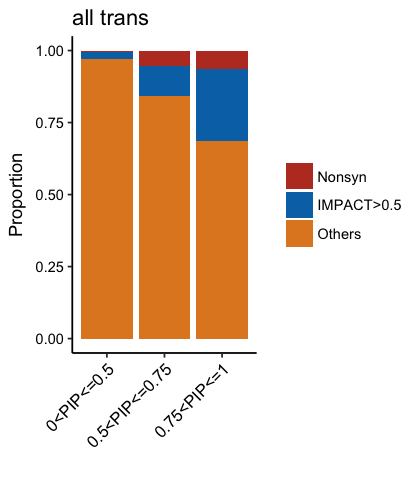

In [14]:
#load data
load("../data/Figure2c.RData")
df2 <- out

#factor
levels(df2$group) <- c(
    "Nonsyn",
    "IMPACT>0.5",
    "Others"
)

levels(df2$cat) <- c(
    #"0<PIP<=0.25",
    "0<PIP<=0.5",
    "0.5<PIP<=0.75",
    "0.75<PIP<=1"
)

options(repr.plot.width=3.5, repr.plot.height=4)

#plot
df2 %>% ggplot(aes(x=cat,y=N,fill=group)) +
    geom_bar(stat="identity",position="fill") +
    theme_bw() +
    scale_fill_nejm(name="")+
    theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), panel.background = element_blank() ) +
    theme( axis.text.x=element_text(size=10,angle=45,vjust = 1, hjust=1)) +
    labs(x="",y="Proportion",title="all trans") 
